# TASK 1: Prediction using Supervised ML

### To predict the percentage of students on the basis of study hours.


### Done by: Preety Tiwari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the data

In [2]:
data=pd.read_csv("C:\\Users\\tiwar\\Downloads\\Students_data.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
#finding the no. of rows and columns
data.shape

(25, 2)

In [7]:
#checking the summary statistics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Data Visualisation

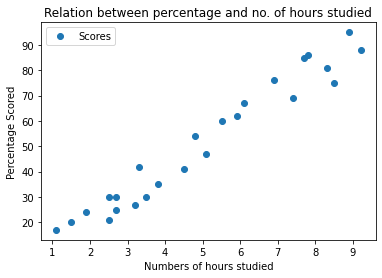

In [5]:
data.plot(x='Hours',y='Scores', style='o')
plt.title('Relation between percentage and no. of hours studied')
plt.xlabel('Numbers of hours studied')
plt.ylabel('Percentage Scored')
plt.show()

We can observe that there exist a positive relationship between numbers of hours studied and the percentage scored.

In [6]:
X=data.values[:,0:-1]
Y=data.values[:,-1]

Splitting the data into train and test data

In [7]:
from sklearn.model_selection import train_test_split

#splitting the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Model Building

In [8]:
from sklearn.linear_model import LinearRegression

#Creating a model object
model = LinearRegression()

#fitting the model
model.fit(X_train,Y_train)

LinearRegression()

In [9]:
#plotting the regression line
line = model.coef_*X+model.intercept_

<function matplotlib.pyplot.show(close=None, block=None)>

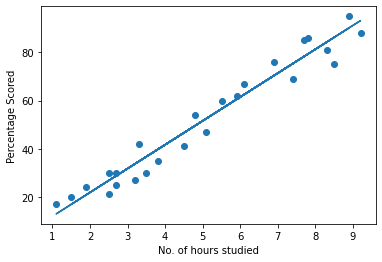

In [15]:
#plot
plt.xlabel('No. of hours studied')
plt.ylabel('Percentage Scored')
plt.scatter(X,Y)
plt.plot(X,line)
plt.show

Model Prediction

In [10]:
Y_pred = model.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [11]:
#Comparing Actual VS predicted model
data1=pd.DataFrame({'Actual':Y_test, 'Predicted': Y_pred})
data1

,Actual,Predicted
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


Model evaluation

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print('R_square= ',r2)

rms = np.sqrt(mean_squared_error(Y_test,Y_pred))
print('Root Mean Square= ',rms)

ars = 1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R Square= ',ars)
print('Mean Absolute Error= ',mean_absolute_error(Y_test,Y_pred))

R_square=  0.9454906892105356
Root Mean Square=  4.6474476121003665
Adjusted R Square=  0.943120719176211
Mean Absolute Error=  4.183859899002975


In [15]:
hours = np.array(9.25)
hours = hours.reshape(-1,1)
predict = model.predict(hours)
print('If the student studies for 9.25 hours then he or she might score {}.'.format(predict[0]))


If the student studies for 9.25 hours then he or she might score 93.69173248737538.
